# S03 T01: Visualització gràfica d'un dataset
## Luis Pardina - Data Science - 13/abr/2022
### Exercicis 1 i 2

***Exercici 1*** : Resumeix gràficament el data set DelayedFlights.csv. Crea almenys una visualització per:
    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


***Exercici 2***: Exporta els gràfics com imatges o com html.

In [1]:
import numpy as np
import pandas as pd
rawtable = pd.read_csv('DelayedFlights.csv', index_col=0)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\chufl\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Creo una vista anomenada ***"incidents"*** que contè els vols que han estat cancel.lats o desviats i una altra vista anomenada ***"flights"*** que contè els vols excloent les incidencies

In [2]:
incidents = rawtable[(rawtable['Diverted'] == 1) | (rawtable['Cancelled'] == 1)]
flights = rawtable[(rawtable['Diverted'] != 1) | (rawtable['Cancelled'] != 1)]
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


**Visualització per a una variable categòrica**: numero total de vols amb incidencia (cancel.lats o desviats) per companyia aèria ("Unique Carrier"), les que encapçalen la llista són Southwest Airlines (WN) i American Airlines (AA). 

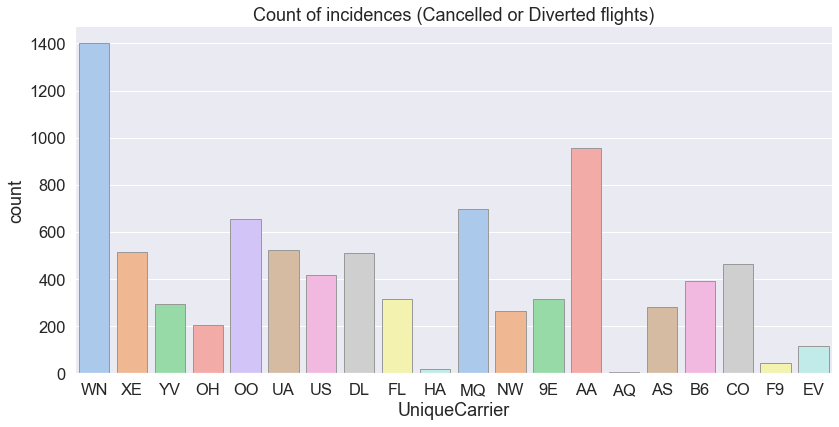

In [3]:
sns.set(font_scale = 1.5)
sns.catplot(x="UniqueCarrier", kind="count",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2,
            data=incidents).set(title="Count of incidences (Cancelled or Diverted flights)");
plt.savefig('01_incidencies.png')

**Visualització per a una variable numèrica**: histograma del retard a la arribada ("ArrDelay") dels vols sense incidència; per a que l'escala no em quedi massa gran trec de la gràfica valors esporàdics > 400 min; s'observa que una gran majoria dels vols arriba amb retard (>0). L'histograma mostra un biaix cap a la dreta.

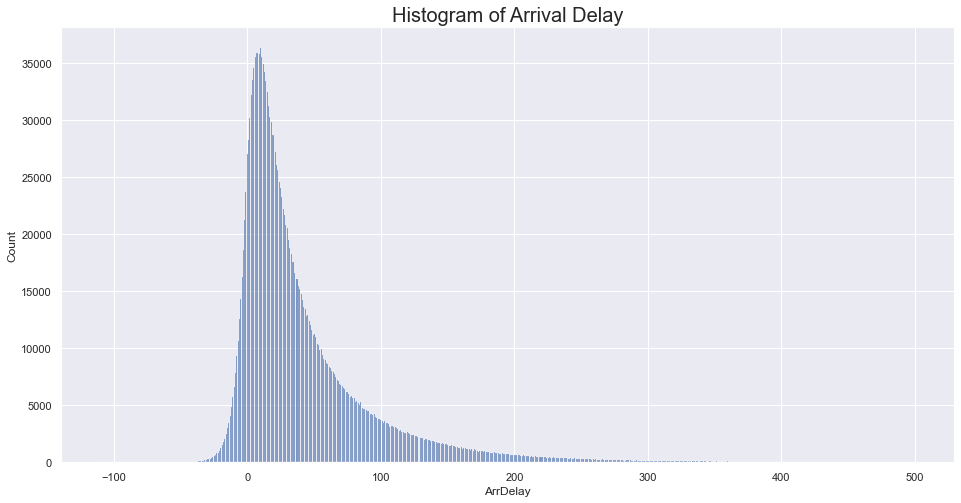

In [4]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data=flights[flights['ArrDelay'] < 500], x="ArrDelay").set_title("Histogram of Arrival Delay",fontsize=20);
plt.savefig('02_hist_retards.png')

**Visualitzacio per a una variable numèrica i una categòrica**: Boxplot amb les mitjanes, quartils, mínim, màxim i *outliers* dels retards a l'arribada per companyia ("ArrDelay" i "UniqueCarrier"). Ho presento horitzontalment perque hi ha molts outliers i els boxplots son llarguíssims. S'observa com hi ha importants diferències als resultats d'aquestes estadístiques entre les diferents companyies.

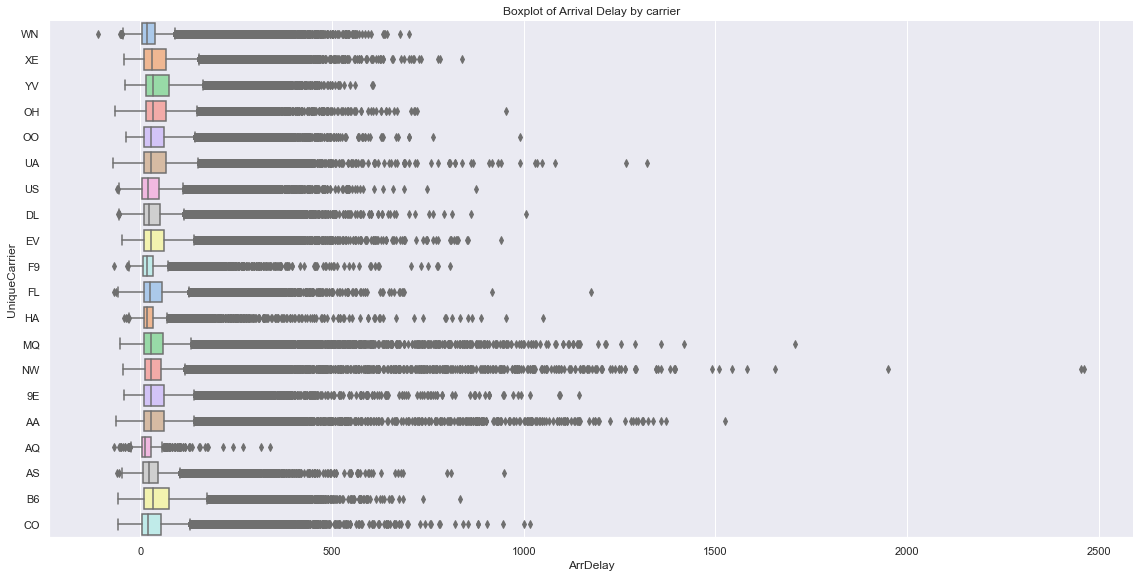

In [5]:
sns.catplot(y="UniqueCarrier", x="ArrDelay", kind ="box",
            palette="pastel", height = 8, aspect = 2,
            data=flights).set(title="Boxplot of Arrival Delay by carrier");
plt.savefig('03_boxplot_arrdelay_bycarrier.png')

**Visualització per a dues variables numèriques**: Retard a l'arribada i retard a la sortida ("ArrDelay" i "DepDelay") amb gràfiques bivariable i univariable. La gràfica mostra una correlació entre ambdues variables ja que normalment el retard a la sortida es transforma en retard a l'arribada, pero també és veu que a moltes ocasions el retard a l'arribada acaba sent més gran que el retard a la sortida.

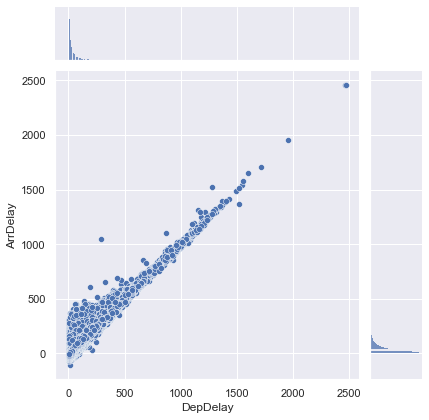

In [6]:
sns.jointplot(data=flights, x="DepDelay", y="ArrDelay");
plt.savefig('04_bivariable_depdelay_arrdelay.png')

Una altra **Visualització per a dues variables numèriques**: incidencies totals (vols cancel.lats i vols desviats) per companyia i per mes ("UniqueCarrier", "Month"). Es veu que al mes de desembre es quan hi ha més incidències per a quasi totes les companyies. 

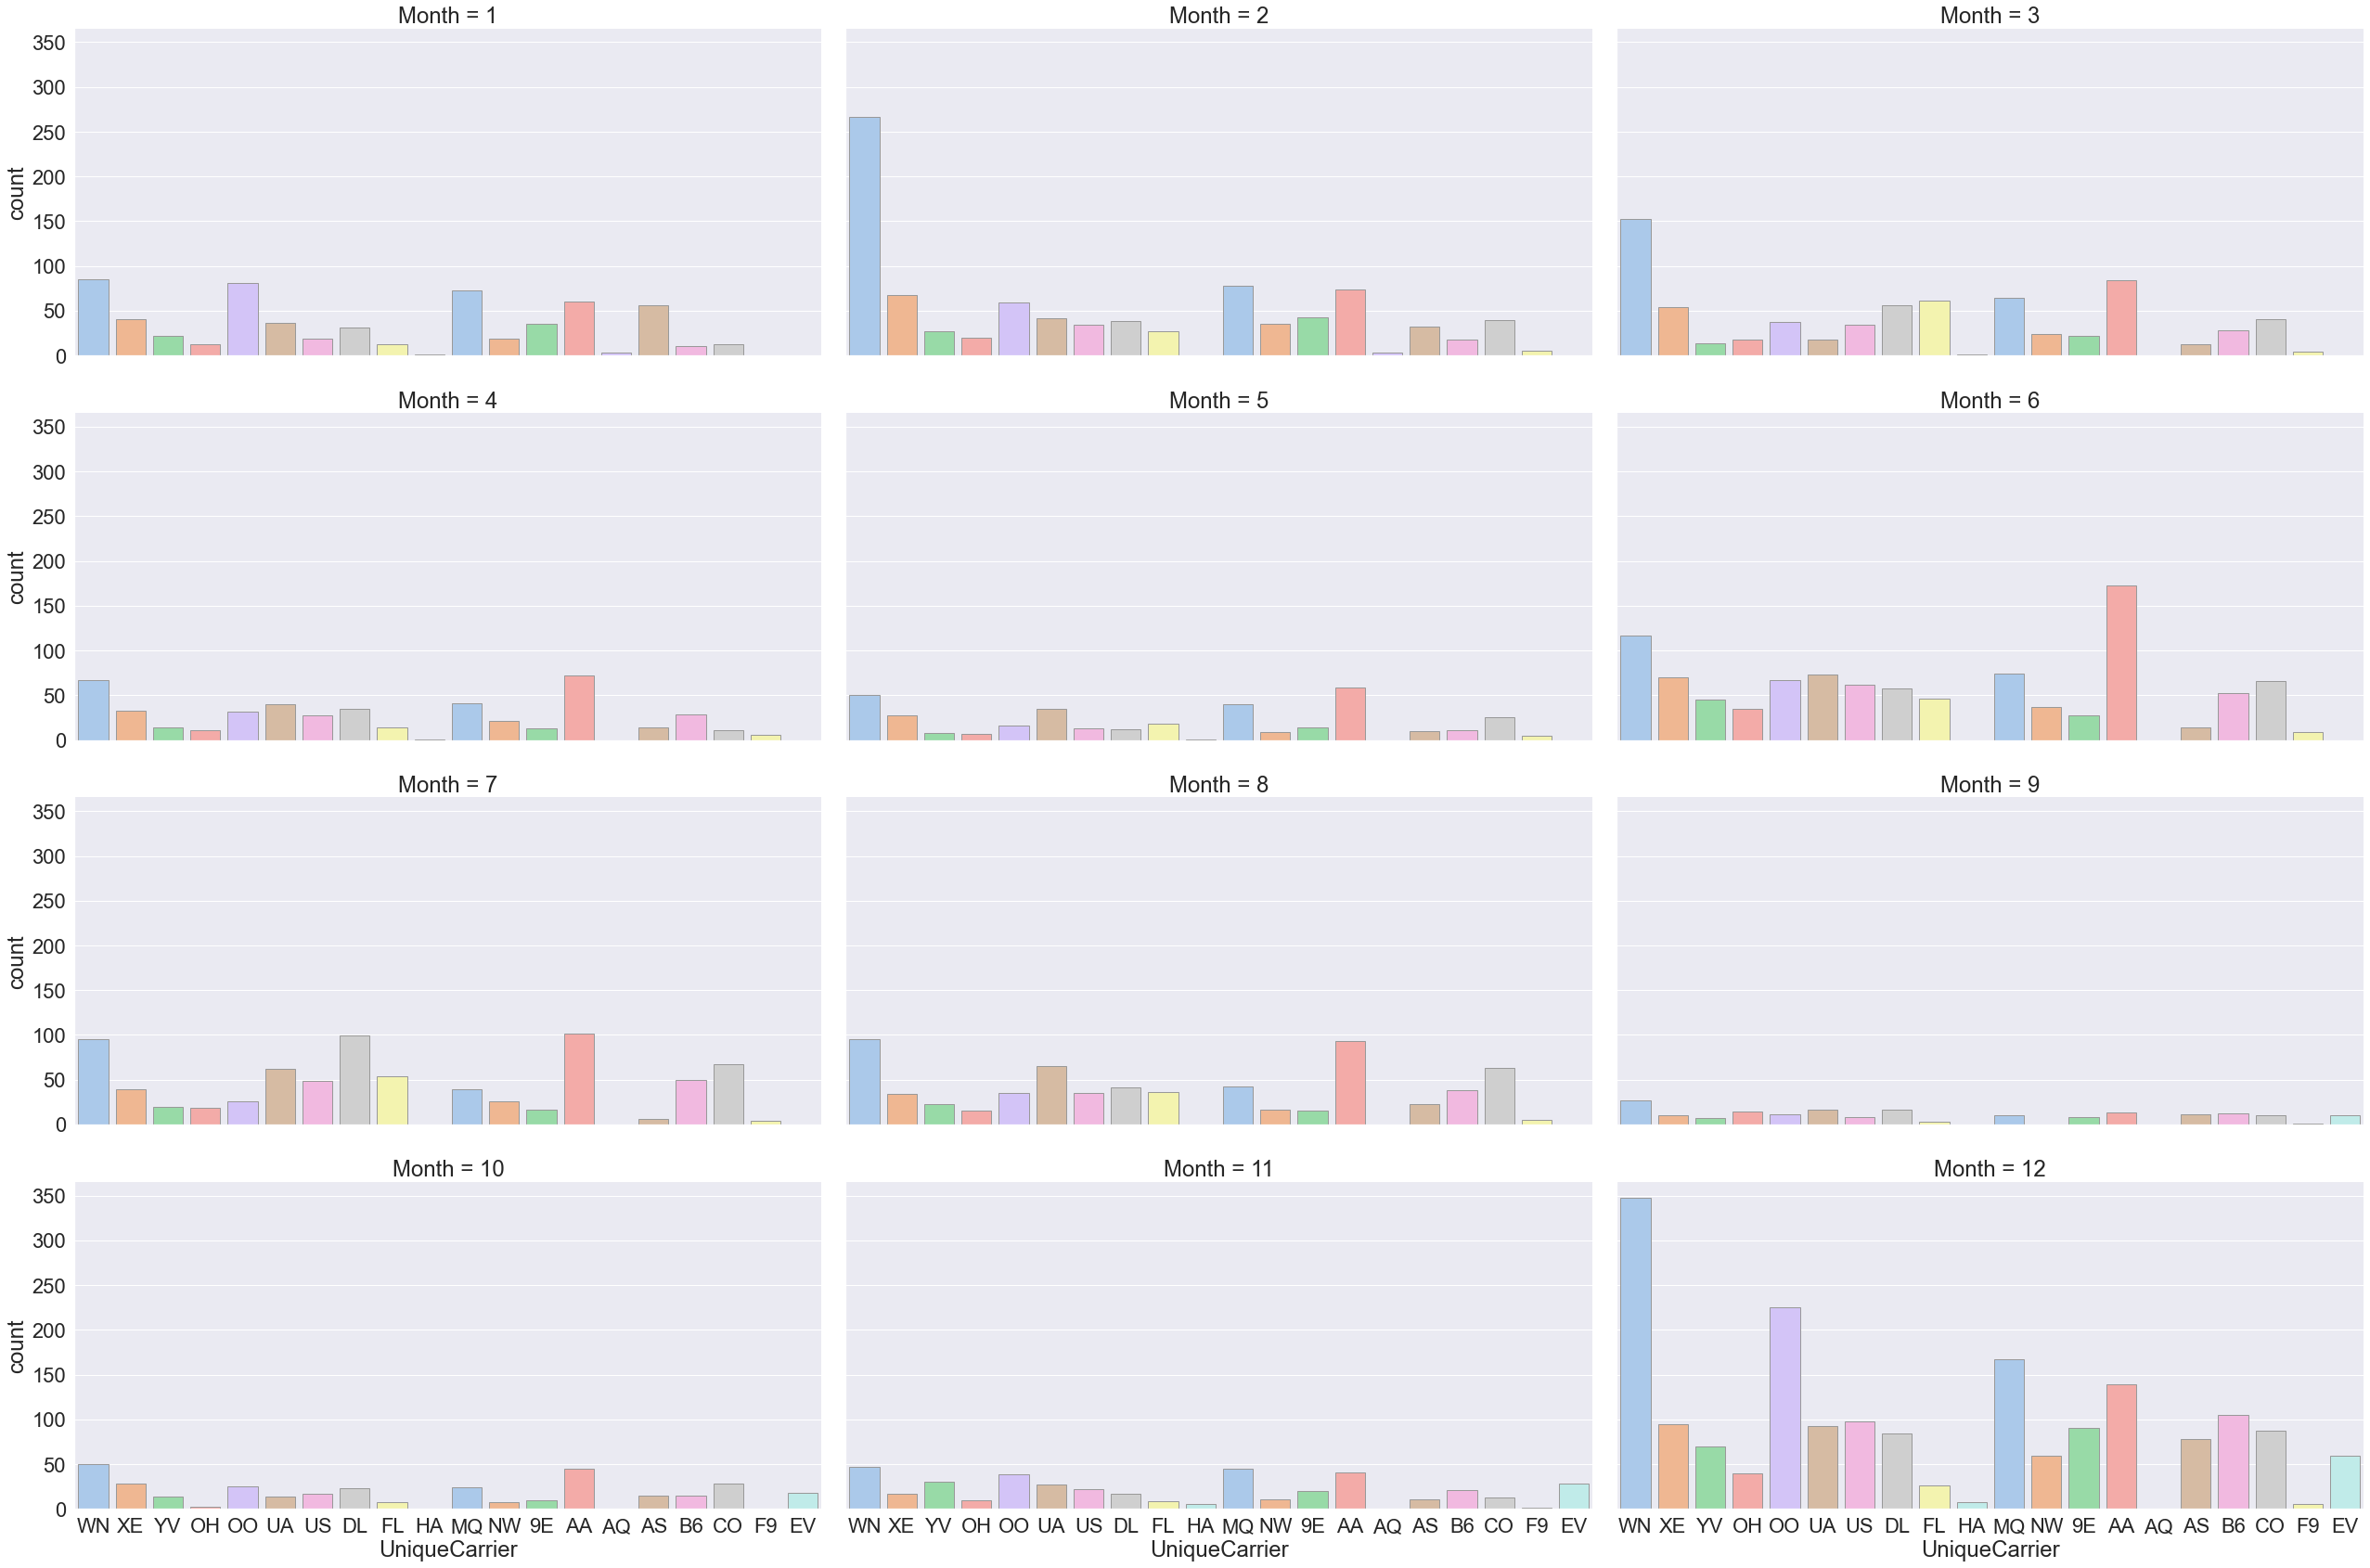

In [7]:
sns.set(font_scale = 2)
sns.catplot(x="UniqueCarrier", kind="count",
            palette="pastel", edgecolor=".6", height = 6, aspect = 2, col='Month', col_wrap = 3,
            data=incidents);
plt.savefig('04_incidenciesmensuals.png')

**Visualització per a tres variables**: *Scatter plot* entre retard a la sortida i retard a l'arribada, distingint per companyia ("ArrDelay", "DepDelay" i "UniqueCarrier"). Es poden apreciar agrupacions de diferents colors, que mostra com les companyies tenen comportaments prou diferents pel que fa als retards.

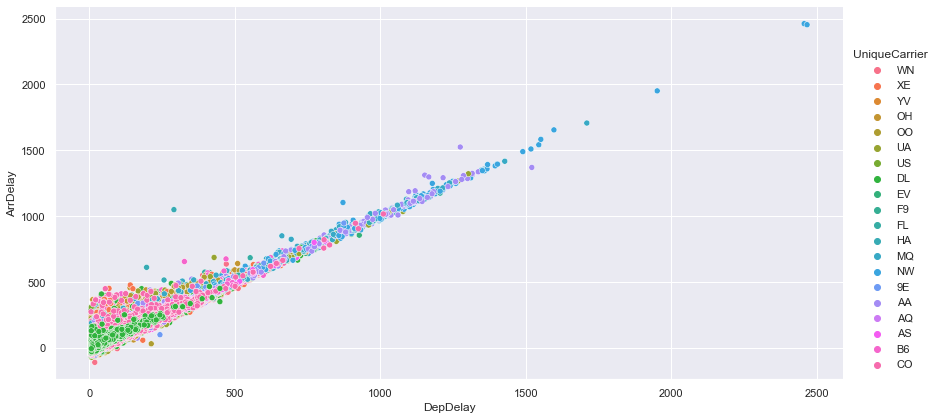

In [8]:
sns.set(font_scale = 1)
sns.relplot(data=flights, x="DepDelay", y="ArrDelay", hue = "UniqueCarrier", height = 6, aspect = 2);
plt.savefig('05_scatter_depdelayarrdelay_bycarrier.png')

Mateixa informació d'abans, pero presentada en gràfics diferents per a cada companyia:

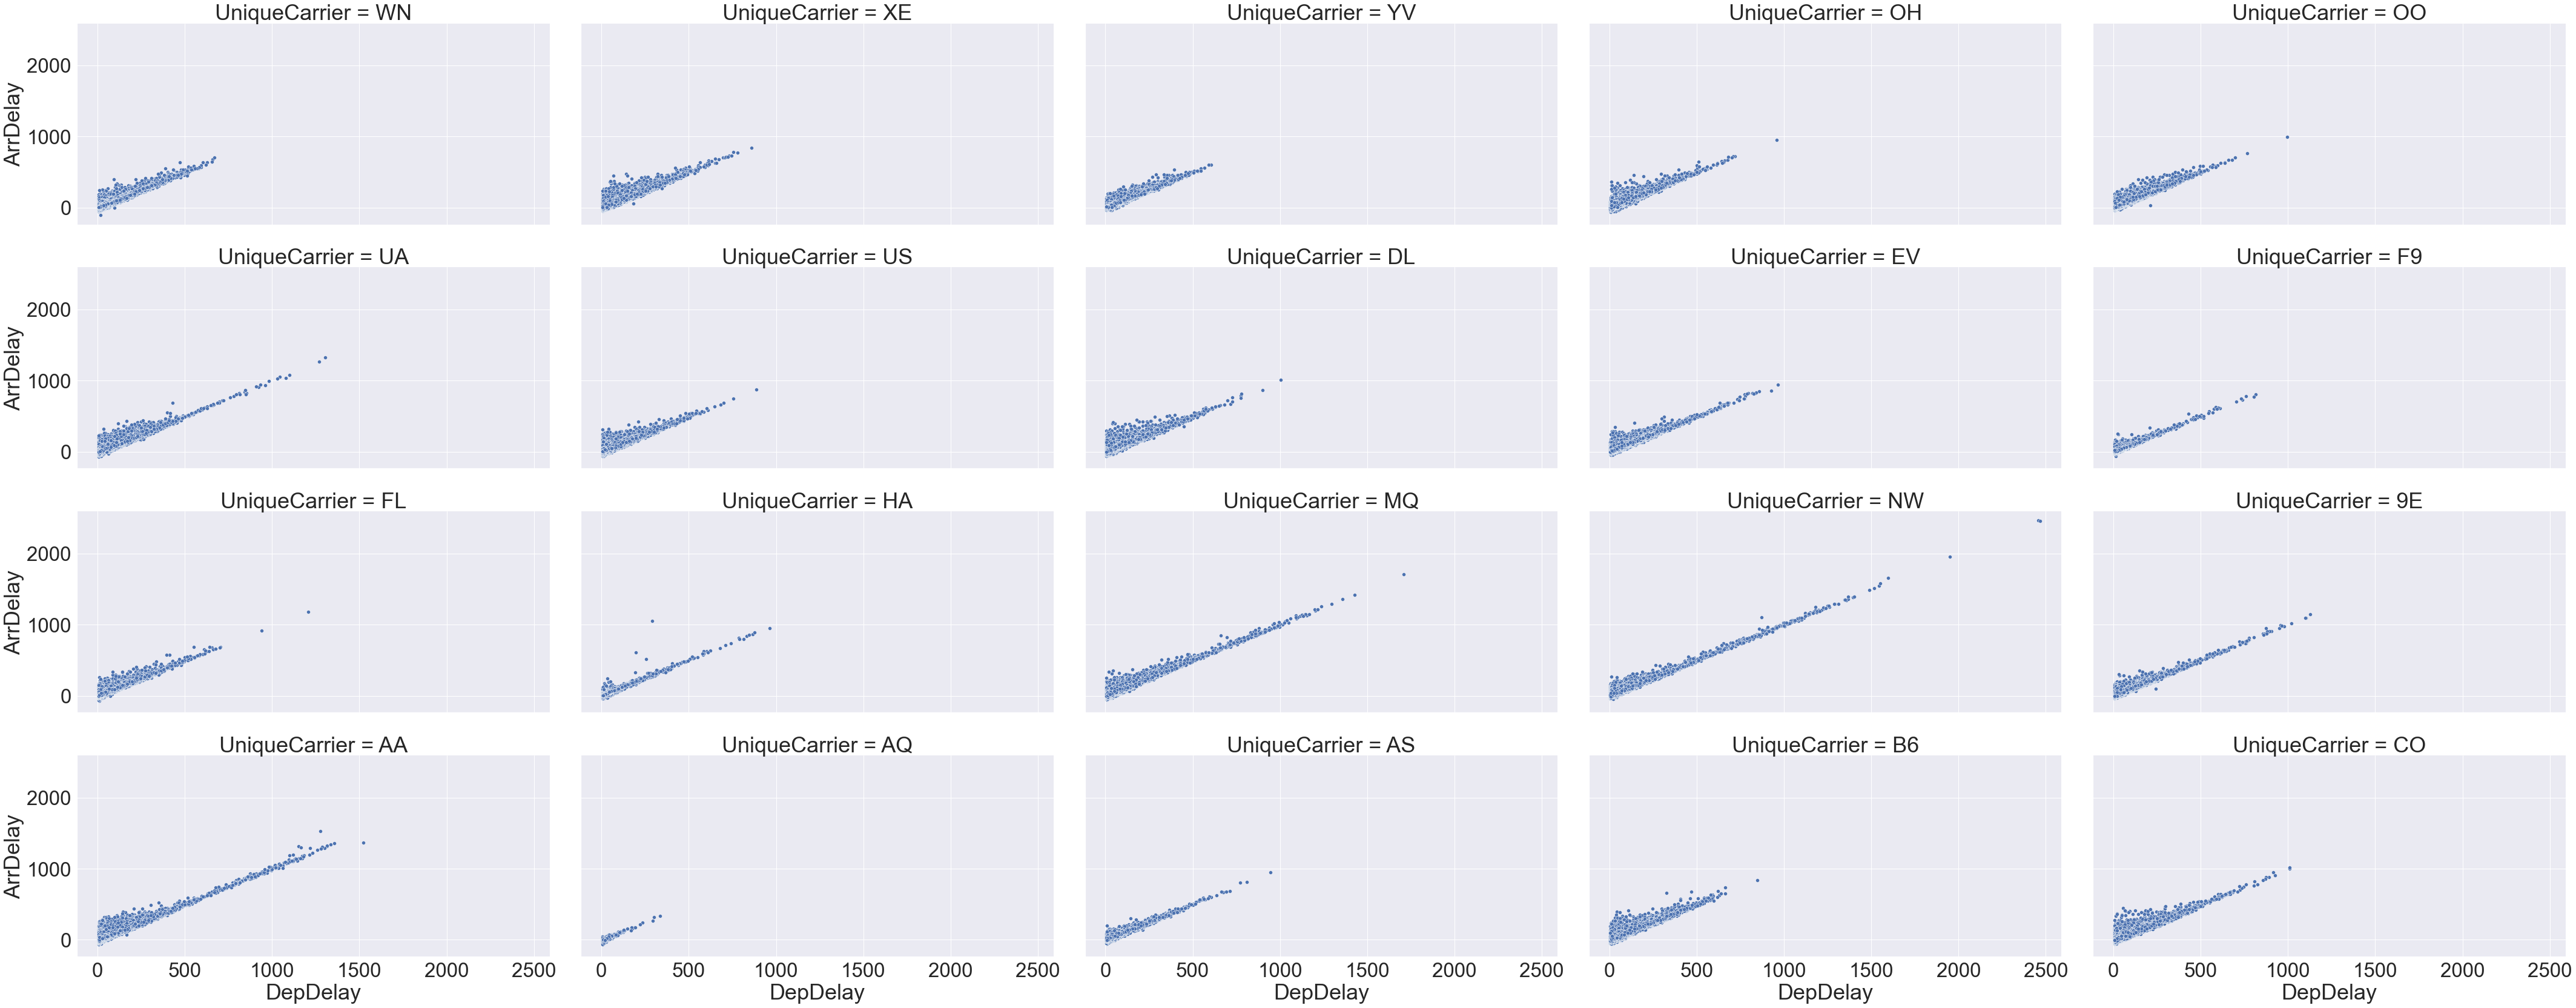

In [9]:
sns.set(font_scale = 3)
sns.relplot(data=flights, x="DepDelay", y="ArrDelay", col = "UniqueCarrier", col_wrap = 5, height = 6, aspect = 2);
plt.savefig('05_multiplescatter_delay_bycarrier.png')

**Visualització per a més de tres variables**:  Relació entre retard a la sortida i retard a l'arribada ("ArrDelay", "DepDelay"), distingint cada dada per companyia ("UniqueCarrier") i per duració del vol ("AirTime"). Visualment no es veu que el vols de durada més llarga tinguin més retard a l'arribada.

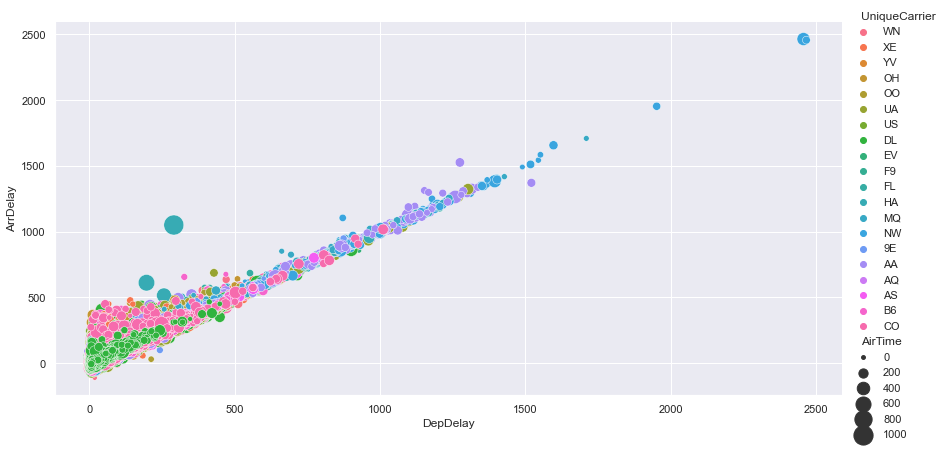

In [10]:
sns.set(font_scale = 1)
sns.relplot(data=flights, x="DepDelay", y="ArrDelay", hue = "UniqueCarrier", size ='AirTime', sizes=(15, 400), height = 6, aspect = 2);
plt.savefig('06_scatter_delays_bycarrierandairtime.png')